In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("autos_dataset.csv")

In [3]:
df.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19     3.4              10.0        102      5500       24   
4         mpfi  3.19     3.4               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

### problem statement

Predict the car price from the given data

### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
df["symboling"].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [7]:
df["symboling"].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [8]:
df["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

##### Here is ? present so we have to replace it with mean or median

In [9]:
df.replace({"?":np.nan},inplace=True)  # replace ? with nan value

In [10]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [11]:
df["normalized-losses"].median()

115.0

In [12]:
df["normalized-losses"].fillna(df["normalized-losses"].median(),inplace=True)

In [13]:
df["num-of-doors"].fillna(df["num-of-doors"].mode()[0],inplace=True)

In [14]:
df["bore"].fillna(df["bore"].median(),inplace=True)

In [15]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [16]:
df["stroke"].fillna(df["stroke"].median(),inplace=True)

In [17]:
df["horsepower"].fillna(df["horsepower"].median(),inplace=True)

In [18]:
df["peak-rpm"].median()

5200.0

In [19]:
df["peak-rpm"].fillna(df["peak-rpm"].median(),inplace=True)

In [20]:
df["price"].value_counts()

8921     2
18150    2
8845     2
8495     2
7609     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 186, dtype: int64

In [21]:
df["price"].median()

10295.0

In [22]:
df["price"].fillna(df["price"].median(),inplace=True)

In [23]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Outlier handling

<AxesSubplot:>

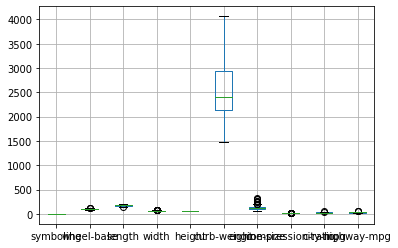

In [24]:
df.boxplot(figsize=(12,6))

<AxesSubplot:>

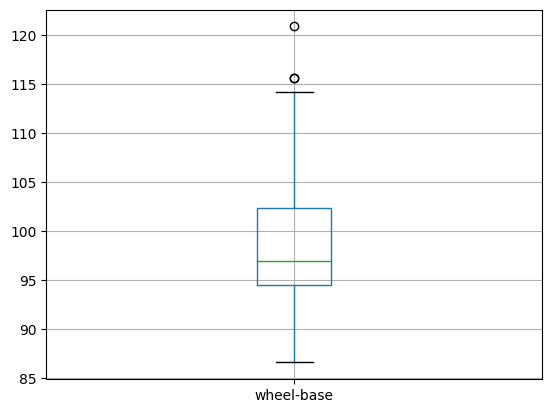

In [25]:
df[["wheel-base"]].boxplot()

In [26]:
z_score_value=np.abs(zscore(df["wheel-base"]))
z_score_value
df[["wheel-base"]].loc[z_score_value>2]
array=np.where(z_score_value>2)
array
array1=df["wheel-base"].to_numpy()
array1[array]=df["wheel-base"].median()


<AxesSubplot:>

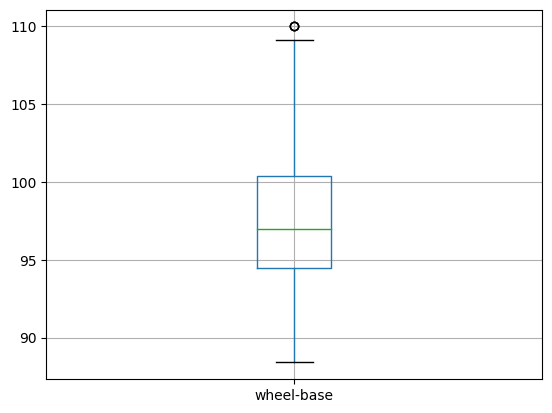

In [27]:
df[["wheel-base"]].boxplot()

<AxesSubplot:>

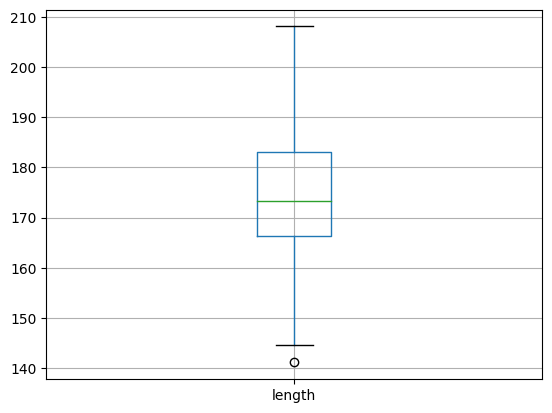

In [28]:
df[["length"]].boxplot()

In [29]:
# z_score_value=np.abs(zscore(df["length"]))
# z_score_value
# df[["length"]].loc[z_score_value>2]
# array=np.where(z_score_value>2)
# array
# array1=df["length"].to_numpy()
# array1[array]=df["length"].median()


<AxesSubplot:>

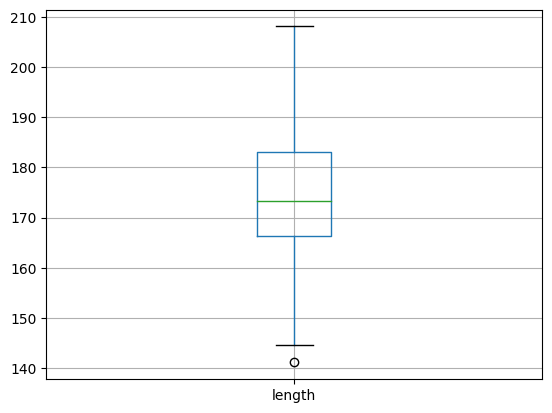

In [30]:
df[["length"]].boxplot()

In [31]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

<AxesSubplot:>

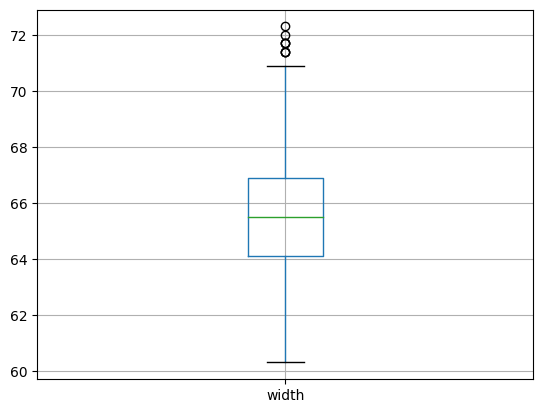

In [32]:
df[["width"]].boxplot()

In [33]:
z_score_value=np.abs(zscore(df["width"]))
z_score_value
df[["width"]].loc[z_score_value>2]
array=np.where(z_score_value>2)
array
array1=df["width"].to_numpy()
array1[array]=df["width"].median()


<AxesSubplot:>

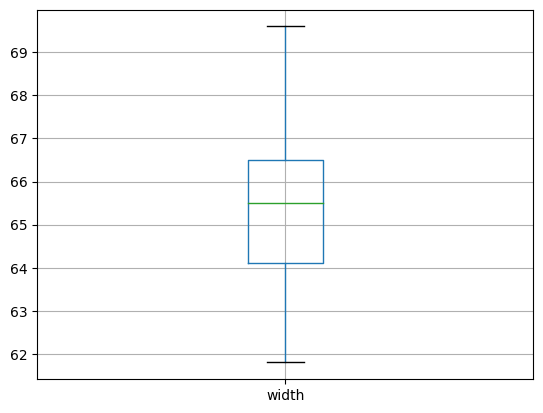

In [34]:
df[["width"]].boxplot()

<AxesSubplot:>

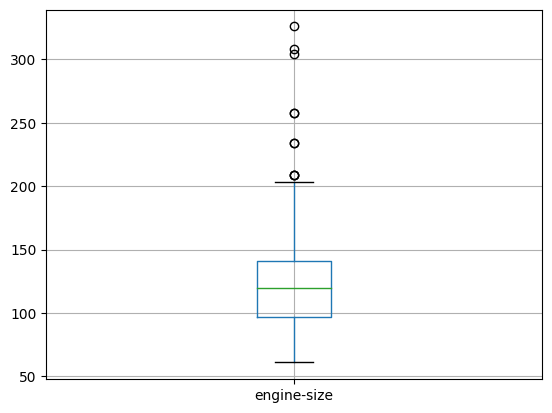

In [35]:
df[["engine-size"]].boxplot()

In [36]:
z_score_value=np.abs(zscore(df["engine-size"]))
z_score_value
df[["engine-size"]].loc[z_score_value>2]
array=np.where(z_score_value>2)
array
array1=df["engine-size"].to_numpy()
array1[array]=df["engine-size"].median()


<AxesSubplot:>

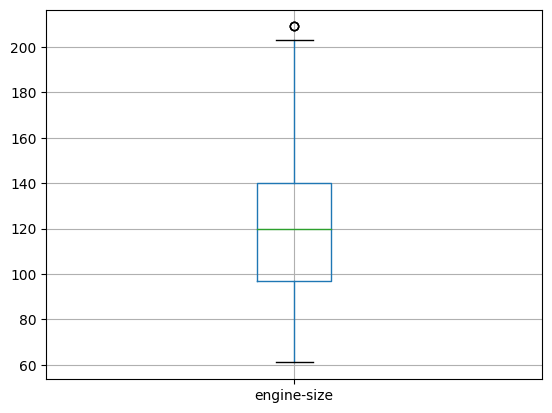

In [37]:
df[["engine-size"]].boxplot()

<AxesSubplot:>

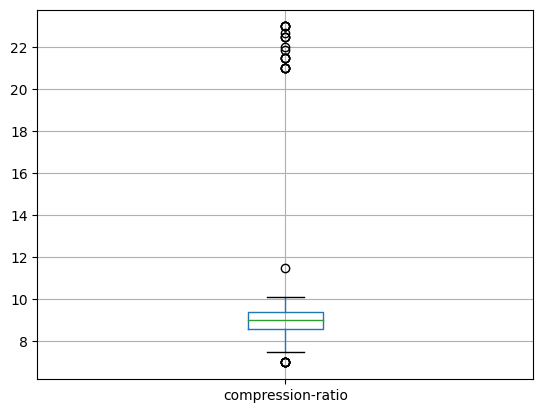

In [38]:
df[["compression-ratio"]].boxplot()

In [39]:
z_score_value=np.abs(zscore(df["compression-ratio"]))
z_score_value
df[["compression-ratio"]].loc[z_score_value>2]
array=np.where(z_score_value>2)
array
array1=df["compression-ratio"].to_numpy()
array1[array]=df["compression-ratio"].median() 


<AxesSubplot:>

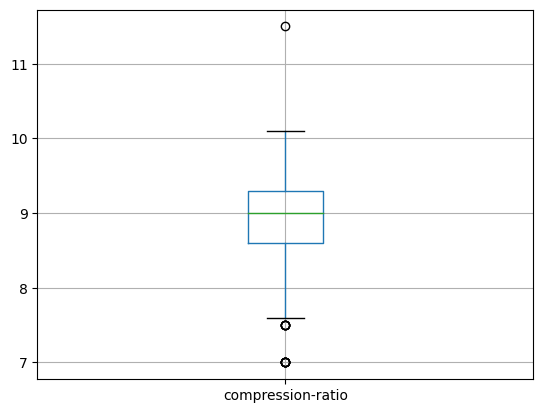

In [40]:
df[["compression-ratio"]].boxplot()

In [41]:
df.columns


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

<AxesSubplot:>

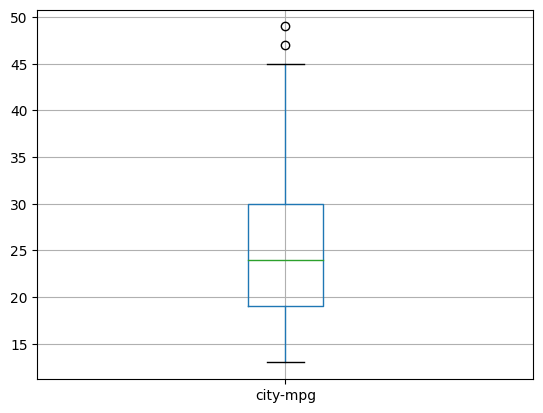

In [42]:
df[["city-mpg"]].boxplot()

<AxesSubplot:>

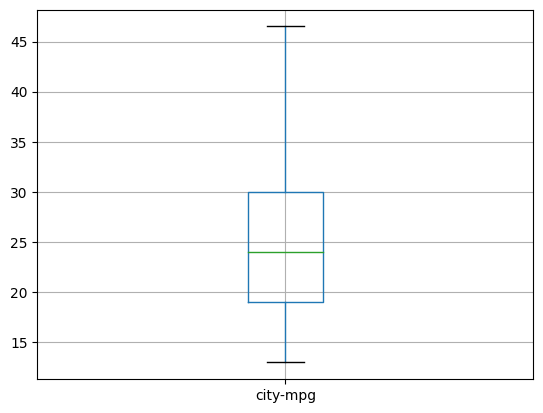

In [43]:
q1=df["city-mpg"].quantile(0.25)
q3=df["city-mpg"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
upper_limit
df[["city-mpg"]].loc[df["city-mpg"]>upper_limit]
df.loc[df["city-mpg"]>upper_limit,"city-mpg"]=upper_limit
df[["city-mpg"]].boxplot()

<AxesSubplot:>

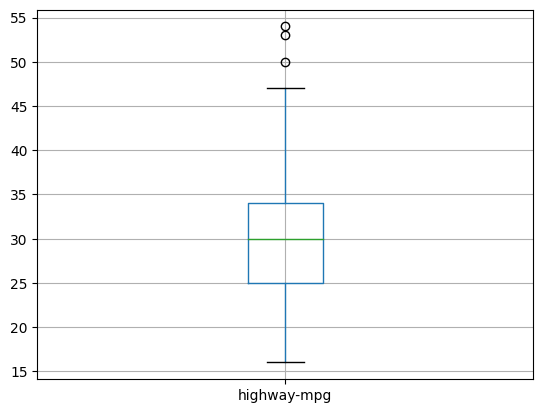

In [44]:
df[["highway-mpg"]].boxplot()

<AxesSubplot:>

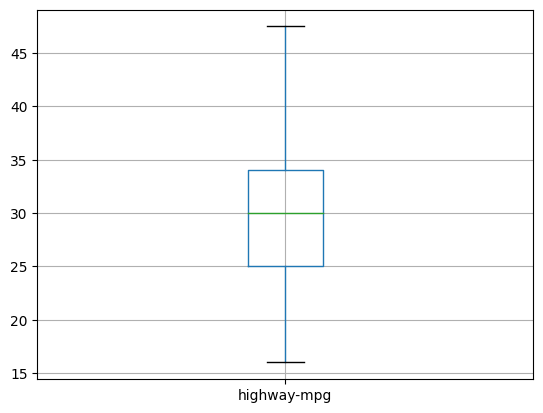

In [45]:
q1=df["highway-mpg"].quantile(0.25)
q3=df["highway-mpg"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
upper_limit
df[["highway-mpg"]].loc[df["highway-mpg"]>upper_limit]
df.loc[df["highway-mpg"]>upper_limit,"highway-mpg"]=upper_limit
df[["highway-mpg"]].boxplot()

In [46]:
df

symboling normalized-losses         make fuel-type aspiration  \
0            3             115.0  alfa-romero       gas        std   
1            3             115.0  alfa-romero       gas        std   
2            1             115.0  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0        111   
1            130         mpfi  3.47    2.68               9.0        111   
2            152         mpfi  2.68    3.47               9.0        154   
3            109         mpfi  3.19     3.4              10.0        102   
4            136         mpfi  3.19     3.4               8.0        115   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15               9.5        114   
201          141         mpfi  3.78    3.15               8.7        160   
202          173         mpfi  3.58    2.87               8.8        134   
203          145          idi  3.01     3.4               9.0        106   
204          141         mpfi  3.78    3.15               9.5        114   

     peak-rpm city-mpg highway-mpg  price  
0        5000     21.0        27.0  13495  
1        5000     21.0        27.0  16500  
2        5000     19.0        26.0  16500  
3        5500     24.0        30.0  13950  
4        5500     18.0        22.0  17450  
..        ...      ...         ...    ...  
200      5400     23.0        28.0  16845  
201      5300     19.0        25.0  19045  
202      5500     18.0        23.0  21485  
203      4800     26.0        27.0  22470  
204      5400     19.0        25.0  22625  

[205 rows x 26 columns]

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [48]:
df["peak-rpm"].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', 5200.0, '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [49]:
df["peak-rpm"]=df["peak-rpm"].astype(int)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

<AxesSubplot:>

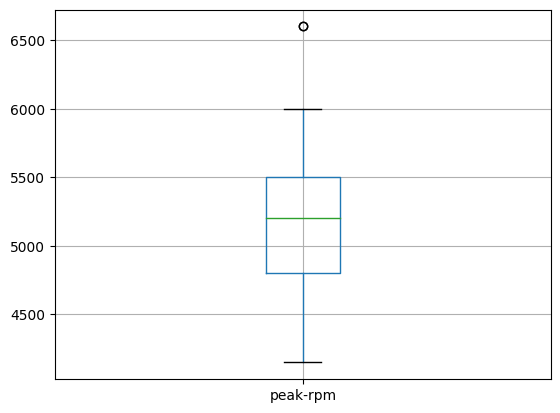

In [51]:
df[["peak-rpm"]].boxplot()

In [52]:
df["horsepower"]=df["horsepower"].astype(int)

<AxesSubplot:>

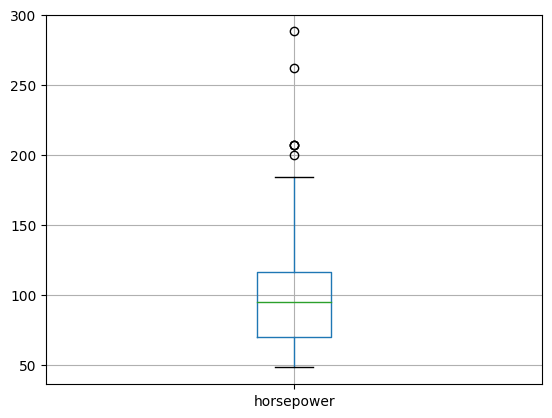

In [53]:
df[["horsepower"]].boxplot()

<AxesSubplot:>

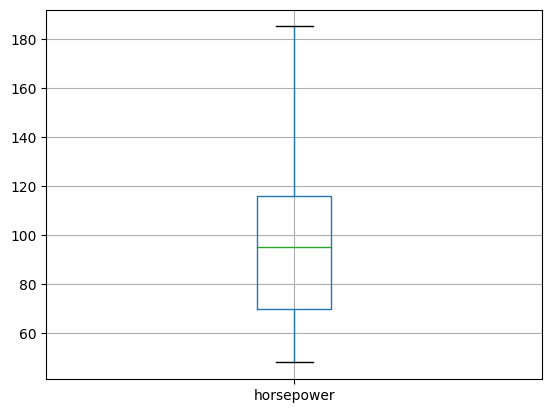

In [54]:
q1=df["horsepower"].quantile(0.25)
q3=df["horsepower"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
upper_limit
df[["horsepower"]].loc[df["horsepower"]>upper_limit]
df.loc[df["horsepower"]>upper_limit,"horsepower"]=upper_limit
df[["horsepower"]].boxplot()

In [55]:
df.head(1)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3             115.0  alfa-romero       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000     21.0   

  highway-mpg  price  
0        27.0  13495  

[1 rows x 26 columns]

### Encoading

In [56]:
df["make"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [57]:
df["fuel-type"].unique()

array(['gas', 'diesel'], dtype=object)

In [58]:
df["fuel-type"].replace({"gas":1,"diesel":0},inplace=True)

In [59]:
dict1={"gas":1,"diesel":0}

In [60]:
df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [61]:
df["aspiration"].replace({"std":1,"turbo":0},inplace=True)

In [62]:
dict2={"std":1,"turbo":0}

In [63]:
df["num-of-doors"].unique()

array(['two', 'four'], dtype=object)

In [64]:
df["num-of-doors"].replace({"two":1,"four":0},inplace=True)

In [65]:
dict3={"two":1,"four":0}

In [66]:
df["body-style"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [67]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [68]:
df["engine-location"].unique()

array(['front', 'rear'], dtype=object)

In [69]:
df["engine-location"].replace({"front":1,"rear":0},inplace=True)

In [70]:
dict4={"front":1,"rear":0}

In [71]:
df["fuel-system"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [72]:
df.head()

symboling normalized-losses         make  fuel-type  aspiration  \
0          3             115.0  alfa-romero          1           1   
1          3             115.0  alfa-romero          1           1   
2          1             115.0  alfa-romero          1           1   
3          2               164         audi          1           1   
4          2               164         audi          1           1   

   num-of-doors   body-style drive-wheels  engine-location  wheel-base  ...  \
0             1  convertible          rwd                1        88.6  ...   
1             1  convertible          rwd                1        88.6  ...   
2             1    hatchback          rwd                1        94.5  ...   
3             0        sedan          fwd                1        99.8  ...   
4             0        sedan          4wd                1        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0        111   
1          130         mpfi  3.47    2.68               9.0        111   
2          152         mpfi  2.68    3.47               9.0        154   
3          109         mpfi  3.19     3.4              10.0        102   
4          136         mpfi  3.19     3.4               8.0        115   

   peak-rpm city-mpg highway-mpg  price  
0      5000     21.0        27.0  13495  
1      5000     21.0        27.0  16500  
2      5000     19.0        26.0  16500  
3      5500     24.0        30.0  13950  
4      5500     18.0        22.0  17450  

[5 rows x 26 columns]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [74]:
df["normalized-losses"]=df["normalized-losses"].astype(int) # convert datatypes

In [75]:
df["engine-type"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [76]:
df["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [77]:
# df["stroke"]=df["stroke"].astype(int)
df["stroke"].unique()
df["stroke"]=df["stroke"].astype(float)

In [78]:
df["price"]=df["price"].astype(int)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int32  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [80]:
df=pd.get_dummies(df,columns=["fuel-system","make","body-style","drive-wheels","engine-type","num-of-cylinders","fuel-system"])

In [81]:
df

symboling  normalized-losses  fuel-type  aspiration  num-of-doors  \
0            3                115          1           1             1   
1            3                115          1           1             1   
2            1                115          1           1             1   
3            2                164          1           1             0   
4            2                164          1           1             0   
..         ...                ...        ...         ...           ...   
200         -1                 95          1           1             0   
201         -1                 95          1           0             0   
202         -1                 95          1           1             0   
203         -1                 95          0           0             0   
204         -1                 95          1           0             0   

     engine-location  wheel-base  length  width  height  ...  \
0                  1        88.6   168.8   64.1    48.8  ...   
1                  1        88.6   168.8   64.1    48.8  ...   
2                  1        94.5   171.2   65.5    52.4  ...   
3                  1        99.8   176.6   66.2    54.3  ...   
4                  1        99.4   176.6   66.4    54.3  ...   
..               ...         ...     ...    ...     ...  ...   
200                1       109.1   188.8   68.9    55.5  ...   
201                1       109.1   188.8   68.8    55.5  ...   
202                1       109.1   188.8   68.9    55.5  ...   
203                1       109.1   188.8   68.9    55.5  ...   
204                1       109.1   188.8   68.9    55.5  ...   

     num-of-cylinders_twelve  num-of-cylinders_two fuel-system_1bbl  \
0                          0                     0                0   
1                          0                     0                0   
2                          0                     0                0   
3                          0                     0                0   
4                          0                     0                0   
..                       ...                   ...              ...   
200                        0                     0                0   
201                        0                     0                0   
202                        0                     0                0   
203                        0                     0                0   
204                        0                     0                0   

     fuel-system_2bbl  fuel-system_4bbl  fuel-system_idi  fuel-system_mfi  \
0                   0                 0                0                0   
1                   0                 0                0                0   
2                   0                 0                0                0   
3                   0                 0                0                0   
4                   0                 0                0                0   
..                ...               ...              ...              ...   
200                 0                 0                0                0   
201                 0                 0                0                0   
202                 0                 0                0                0   
203                 0                 0                1                0   
204                 0                 0                0                0   

     fuel-system_mpfi  fuel-system_spdi  fuel-system_spfi  
0                   1                 0                 0  
1                   1                 0                 0  
2                   1                 0                 0  
3                   1                 0                 0  
4                   1                 0                 0  
..                ...               ...               ...  
200                 1                 0                 0  
201                 1                 0                 0  
202                 1        

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                205 non-null    int64  
 1   normalized-losses        205 non-null    int32  
 2   fuel-type                205 non-null    int64  
 3   aspiration               205 non-null    int64  
 4   num-of-doors             205 non-null    int64  
 5   engine-location          205 non-null    int64  
 6   wheel-base               205 non-null    float64
 7   length                   205 non-null    float64
 8   width                    205 non-null    float64
 9   height                   205 non-null    float64
 10  curb-weight              205 non-null    int64  
 11  engine-size              205 non-null    int64  
 12  bore                     205 non-null    object 
 13  stroke                   205 non-null    float64
 14  compression-ratio        2

In [83]:
df["bore"]=df["bore"].astype(float)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                205 non-null    int64  
 1   normalized-losses        205 non-null    int32  
 2   fuel-type                205 non-null    int64  
 3   aspiration               205 non-null    int64  
 4   num-of-doors             205 non-null    int64  
 5   engine-location          205 non-null    int64  
 6   wheel-base               205 non-null    float64
 7   length                   205 non-null    float64
 8   width                    205 non-null    float64
 9   height                   205 non-null    float64
 10  curb-weight              205 non-null    int64  
 11  engine-size              205 non-null    int64  
 12  bore                     205 non-null    float64
 13  stroke                   205 non-null    float64
 14  compression-ratio        2

### train test split

In [85]:
x=df.drop("price",axis=1)
y=df["price"]

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

### model training with Decision Tree

In [87]:
Decsion_model=DecisionTreeRegressor()

In [88]:
Decsion_model.fit(x_train,y_train)

DecisionTreeRegressor()

### evaluation matrix on testing

In [90]:
y_pred_test=Decsion_model.predict(x_test)

mae=mean_absolute_error(y_test,y_pred_test)
print("mean absolute error is",mae)

mse=mean_squared_error(y_test,y_pred_test)
print("mean square error is",mse)

rmse=np.sqrt(mse)
print("root mean squared error is",rmse)

r2=r2_score(y_test,y_pred_test)
print("accuracy of model is",r2)


mean absolute error is 1866.5
mean square error is 7356094.542682927
root mean squared error is 2712.2121124062046
accuracy of model is 0.8500182507163283


### evaluation matrix on training

In [92]:
y_pred_train=Decsion_model.predict(x_train)
y_pred_train
mae=mean_absolute_error(y_train,y_pred_train)
print("mean absolute error is",mae)

mse=mean_squared_error(y_train,y_pred_train)
print("mean square error is",mse)

rmse=np.sqrt(mse)
print("root mean squared error is",rmse)

r2=r2_score(y_train,y_pred_train)
print("accuracy of model is",r2)


mean absolute error is 30.896341463414632
mean square error is 21229.844512195123
root mean squared error is 145.70464821753328
accuracy of model is 0.9996729748753602


In [128]:
dfnew=pd.DataFrame()
dfnew["predicted"]=y_pred_test
y_test=y_test.reset_index(drop=True)
dfnew["actual"]=y_test
dfnew.head() 

predicted  actual
0  12697.500000   16500
1  14489.000000   12629
2   5514.333333    5389
3  13320.666667   14399
4  35535.333333   34184

### Decision tree with hyperparameter tunning

In [97]:
D_tree=DecisionTreeRegressor()

hyperparameter={"criterion":["squared_error"],"splitter":["best"],"max_depth":np.arange(1,20),
               "min_samples_split":np.arange(2,20),"min_samples_leaf":np.arange(1,15)}

gscv=GridSearchCV(D_tree,hyperparameter,cv=5)

gscv.fit(x_train,y_train)
gscv.best_estimator_


DecisionTreeRegressor(max_depth=16, min_samples_split=4)

In [105]:
Gscv_best_hyp_model=gscv.best_estimator_
# Gscv_best_hyp_model.fit(x_train,y_train)

### model evalution on testing data wit hyperparameter tunning

In [103]:
y_pred_test=Gscv_best_hyp_model.predict(x_test)

mae=mean_absolute_error(y_test,y_pred_test)
print("mean absolute error is",mae)

mse=mean_squared_error(y_test,y_pred_test)
print("mean square error is",mse)

rmse=np.sqrt(mse)
print("root mean squared error is",rmse)

r2=r2_score(y_test,y_pred_test)
print("accuracy of model is",r2)


mean absolute error is 1717.166666666667
mean square error is 6209903.011517615
root mean squared error is 2491.967698730787
accuracy of model is 0.8733876908262709


### model evalution for training data with hyperparameter tunning

In [104]:
y_pred_train=Gscv_best_hyp_model.predict(x_train)
y_pred_train
mae=mean_absolute_error(y_train,y_pred_train)
print("mean absolute error is",mae)

mse=mean_squared_error(y_train,y_pred_train)
print("mean square error is",mse)

rmse=np.sqrt(mse)
print("root mean squared error is",rmse)

r2=r2_score(y_train,y_pred_train)
print("accuracy of model is",r2)


mean absolute error is 391.1077235772358
mean square error is 647271.4461382113
root mean squared error is 804.5318179775187
accuracy of model is 0.990029412357328


### ccp alpha(pruning)

In [134]:
d_tree=DecisionTreeRegressor()
result=d_tree.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_lst=result["ccp_alphas"]

In [136]:
train_accuracy_lst=[]
test_accuracy_lst=[]

for i in ccp_alpha_lst:
    
    d_tree=DecisionTreeRegressor(ccp_alpha=i)
    d_tree.fit(x_train,y_train)
    
    training_accuracy=d_tree.score(x_train,y_train)
    train_accuracy_lst.append(training_accuracy)
    
    testing_accuracy=d_tree.score(x_test,y_test)
    test_accuracy_lst.append(testing_accuracy)
    
    
    

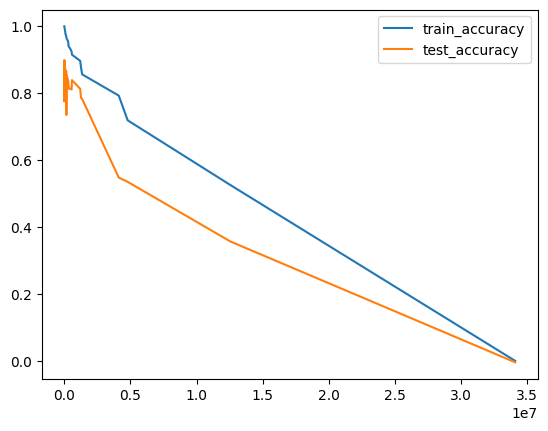

In [138]:
ax=plt.subplot()
ax.plot(ccp_alpha_lst,train_accuracy_lst,label="train_accuracy")
ax.plot(ccp_alpha_lst,test_accuracy_lst,label="test_accuracy")
ax.legend()

In [141]:
index_max_accuracy=test_accuracy_lst.index(max(test_accuracy_lst))

In [144]:
best_ccp=ccp_alpha_lst[index_max_accuracy]

In [145]:
dtree_pruning=DecisionTreeRegressor(random_state=7,ccp_alpha=best_ccp)
dtree_pruning.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=183.56199186990352, random_state=7)

### model evalution on testing

In [146]:
y_pred_test=dtree_pruning.predict(x_test)

mae=mean_absolute_error(y_test,y_pred_test)
print("mean absolute error is",mae)

mse=mean_squared_error(y_test,y_pred_test)
print("mean square error is",mse)

rmse=np.sqrt(mse)
print("root mean squared error is",rmse)

r2=r2_score(y_test,y_pred_test)
print("accuracy of model is",r2)


mean absolute error is 1952.4756097560976
mean square error is 7245220.086043361
root mean squared error is 2691.6946494807617
accuracy of model is 0.8522788449570888


### model evolution on training data

In [ ]:
y_pred_train=Gscv_best_hyp_model.predict(x_train)
y_pred_train
mae=mean_absolute_error(y_train,y_pred_train)
print("mean absolute error is",mae)

mse=mean_squared_error(y_train,y_pred_train)
print("mean square error is",mse)

rmse=np.sqrt(mse)
print("root mean squared error is",rmse)

r2=r2_score(y_train,y_pred_train)
print("accuracy of model is",r2)


<AxesSubplot:>

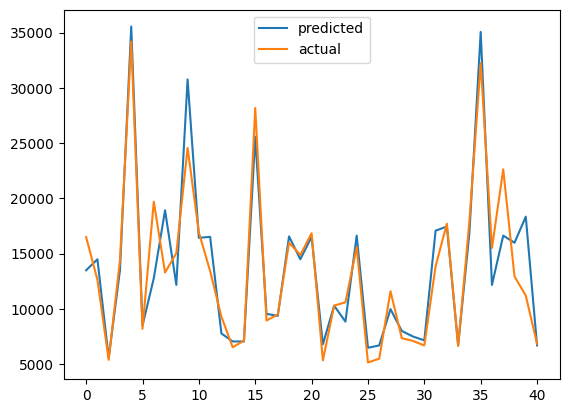

In [106]:
dfnew.plot(kind='line')

### user input

In [108]:
x.head(1).T

0
symboling            3.0
normalized-losses  115.0
fuel-type            1.0
aspiration           1.0
num-of-doors         1.0
...                  ...
fuel-system_idi      0.0
fuel-system_mfi      0.0
fuel-system_mpfi     1.0
fuel-system_spdi     0.0
fuel-system_spfi     0.0

[79 rows x 1 columns]

In [109]:
print(dict1)
print(dict2)
print(dict3)
print(dict4)

{'gas': 1, 'diesel': 0}
{'std': 1, 'turbo': 0}
{'two': 1, 'four': 0}
{'front': 1, 'rear': 0}


In [110]:
project_data={"fuel-type":dict1,"aspiration":dict2,"num-of-doors":dict3,"engine-location":dict4,"columns":list(x.columns)}
project_data

{'fuel-type': {'gas': 1, 'diesel': 0},
 'aspiration': {'std': 1, 'turbo': 0},
 'num-of-doors': {'two': 1, 'four': 0},
 'engine-location': {'front': 1, 'rear': 0},
 'columns': ['symboling',
  'normalized-losses',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'engine-location',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'engine-size',
  'bore',
  'stroke',
  'compression-ratio',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg',
  'fuel-system_1bbl',
  'fuel-system_2bbl',
  'fuel-system_4bbl',
  'fuel-system_idi',
  'fuel-system_mfi',
  'fuel-system_mpfi',
  'fuel-system_spdi',
  'fuel-system_spfi',
  'make_alfa-romero',
  'make_audi',
  'make_bmw',
  'make_chevrolet',
  'make_dodge',
  'make_honda',
  'make_isuzu',
  'make_jaguar',
  'make_mazda',
  'make_mercedes-benz',
  'make_mercury',
  'make_mitsubishi',
  'make_nissan',
  'make_peugot',
  'make_plymouth',
  'make_porsche',
  'make_renault',
  'make_saab',
  'make_subaru',
  'make_toyota',


In [111]:
x.iloc[0:1,35:]

make_mazda  make_mercedes-benz  make_mercury  make_mitsubishi  make_nissan  \
0           0                   0             0                0            0   

   make_peugot  make_plymouth  make_porsche  make_renault  make_saab  ...  \
0            0              0             0             0          0  ...   

   num-of-cylinders_twelve  num-of-cylinders_two  fuel-system_1bbl  \
0                        0                     0                 0   

   fuel-system_2bbl  fuel-system_4bbl  fuel-system_idi  fuel-system_mfi  \
0                 0                 0                0                0   

   fuel-system_mpfi  fuel-system_spdi  fuel-system_spfi  
0                 1                 0                 0  

[1 rows x 44 columns]

In [112]:
x.head(1).shape

(1, 79)

In [113]:
symboling=3
normalized_losses=115
fuel_type="gas"
aspiration="turbo"
num_of_doors="two"
engine_location="front"
wheel_base=88.6
length=168.8
width=64.1
height=48
curb_weight=2548
bore=3.47
stroke=2.68
compression_ratio=9
horsepower=111
peak_rpm=5000
city_mpg=21
highway_mpg=27


fuel_system="mpfi"
make="bmw"
body_style="convertible"
drive_wheels="fwd"
engine_type="ohcv"
num_of_cylinders="six"
fuel_system="mpfi"

In [114]:
fuel_system1="fuel-system_"+fuel_system
index_value1=project_data["columns"].index(fuel_system1)
index_value1

24

In [115]:
make1="make_"+make
index_value2=project_data["columns"].index(make1)
index_value2

29

In [116]:
body_style1="body-style_"+body_style
index_value3=project_data["columns"].index(body_style1)
index_value3=project_data["columns"].index(body_style1)
index_value3

49

In [117]:
drive_wheels1="drive-wheels_"+drive_wheels
index_value4=project_data["columns"].index(drive_wheels1)
index_value4


55

In [118]:
engine_type1="engine-type_"+engine_type
index_value5=project_data["columns"].index(engine_type1)
index_value5

62

In [119]:
num_of_cylinders1="num-of-cylinders_"+num_of_cylinders
index_value6=project_data["columns"].index(num_of_cylinders1)
index_value6

67

In [120]:
fuel_system1="fuel-system_"+fuel_system
index_value7=project_data["columns"].index(fuel_system1)
index_value7

24

In [121]:
array=np.zeros(len(project_data["columns"]))
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [122]:
project_data["fuel-type"][fuel_type]

1

In [123]:
array[0]=symboling
array[1]=normalized_losses
array[2]=project_data["fuel-type"][fuel_type]
array[3]=project_data["aspiration"][aspiration]
array[4]=project_data["num-of-doors"][num_of_doors]
array[5]=project_data["engine-location"][engine_location]
array[6]=wheel_base
array[7]=length
array[8]=width
array[9]=height
array[10]=curb_weight
array[11]=bore
array[12]=stroke
array[13]=compression_ratio
array[14]=horsepower
array[15]=peak_rpm
array[16]=city_mpg
array[17]=highway_mpg
array[index_value1]=1
array[index_value2]=1
array[index_value3]=1
array[index_value4]=1
array[index_value5]=1
array[index_value6]=1
array[index_value7]=1

array

array([3.000e+00, 1.150e+02, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
       8.860e+01, 1.688e+02, 6.410e+01, 4.800e+01, 2.548e+03, 3.470e+00,
       2.680e+00, 9.000e+00, 1.110e+02, 5.000e+03, 2.100e+01, 2.700e+01,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00])

In [124]:
prediction=Gscv_best_hyp_model.predict([array])[0]
pred=np.around(prediction,2)
print("price of car is in Rs",pred)

price of car is in Rs 10295.0


### pickle file

In [129]:
import pickle
import json
with open("Decision_tree_autos_model.pkl","wb")as f:
    pickle.dump(Gscv_best_hyp_model,f)

In [130]:
with open("decision_project_data_autos.json","w")as f:
    json.dump(project_data,f)